# Customer Churn Prediction in Fintech Industry

In this project, we use supervised learning models to identify customers for a Fintech Company who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration]
<li>[Part 2: Feature Preprocessing]
<li>[Part 3: Model Training and Results Evaluation]
<li>[Part 4: Feature Selection]
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('churn_data.csv')

In [2]:
churn_df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

Num of rows: 27000
Num of columns: 31


In [4]:
churn_df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Part 1.2: Data cleaning

#### 1.2.1 Remove Missing value

In [5]:
# check the number of missing value
churn_df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

- Drop 4 rows for the column of age, and drop entire columns of credit_score and rewards_earned because these columns has too many NA

In [0]:
churn_df = churn_df[pd.notnull(churn_df['age'])]
churn_df = churn_df.drop(columns = ['credit_score','rewards_earned'])

### Part 1.3:  Understand the features

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

#### Part 1.3.1 Correlation with response variable

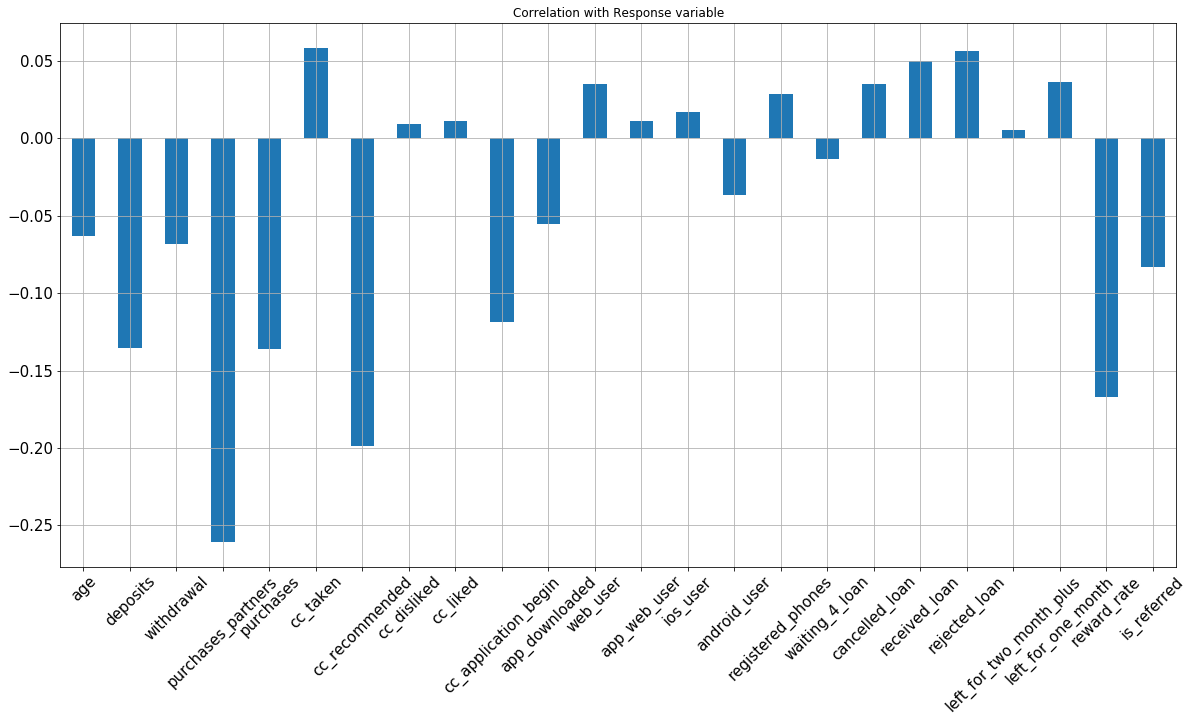

In [8]:
# Use numerical value to find the correlation between independent variable and dependent variable
churn_df.drop(columns = ['churn','user','housing', 'payment_type',
                       'zodiac_sign']
    ).corrwith(churn_df.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

In [0]:
corr = churn_df[["age", "deposits", "withdrawal",
                    "purchases_partners", "purchases", "cc_taken",
                    "cc_recommended", "cc_disliked", "cc_liked",
                    "cc_application_begin", "app_downloaded", "web_user",
                    "app_web_user","ios_user","android_user","registered_phones",
                "waiting_4_loan","cancelled_loan","received_loan","rejected_loan",
                "left_for_two_month_plus","left_for_one_month","reward_rate","is_referred"]].corr()

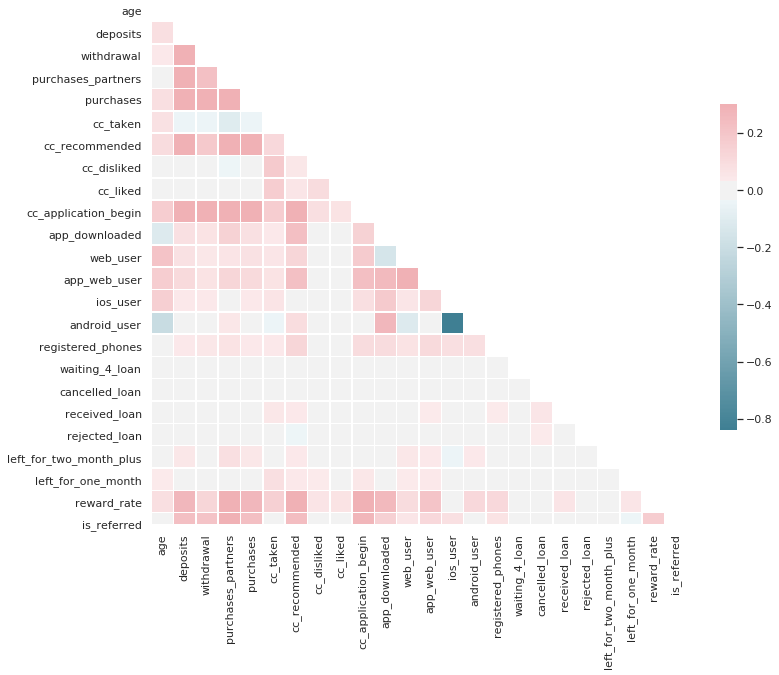

In [10]:
## Correlation Matrix
sb.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
from scipy.stats import pearsonr
print (pearsonr(churn_df['ios_user'], churn_df['android_user'])[0])

-0.8400843218424062


- We find that 'ios_user' and 'android_user' have a strong negative correlation
- It is understandable that most people only have one cell phone either ios system or android system 
- **we can drop either iso_user or android user** because these two features have a high similarity

In [0]:
# Removing Correlated Fields which is ios_user
churn_df = churn_df.drop(columns = ['ios_user'])

In [13]:
churn_df.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,1,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


# Part 2: Feature Preprocessing

## 2.1 Independent variable and dependent variable separation

- drop user because it is a unique key to identify each user, don't have much meaning
- drop dependent variable 'churn'

In [0]:
user_identifier = churn_df['user']

In [0]:
## Data Preparation
dataset = churn_df.drop(columns = ['user','churn'])

## 2.2 Catagorical variable transformation

In [16]:
# shows catagorical data
print(dataset.housing.value_counts())
print(' ')
print(dataset.zodiac_sign.value_counts())
print(' ')
print(dataset.payment_type.value_counts())

na    13856
R     10969
O      2171
Name: housing, dtype: int64
 
Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2155
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64
 
Bi-Weekly       12713
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2439
Name: payment_type, dtype: int64


In [0]:
# transform catagorical value and remove NA value for each feature after tranformation
# One-Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])
X = dataset

In [18]:
X.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,37.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,28.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.47,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,35.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.17,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.10,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,27.0,0,0,2,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0.03,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
y = churn_df['churn'] 

In [20]:
print ("Num of rows: " + str(dataset.shape[0])) # row count
print ("Num of columns: " + str(dataset.shape[1])) # col count

Num of rows: 26996
Num of columns: 41


## 2.3 Standarization

In [0]:
# Scale the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = X.columns.values
X.index=X.index.values

In [23]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 26996 observations and 41 features
Unique target labels: [0 1]


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [24]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 21596 observation with 41 features
test data has 5400 observation with 41 features


### Part 3.2: Model Training and Selection

### Train logistic regression, KNN, Random Forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

### Use 5 fold cross validation find the average accuracy for each model

In [26]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.647
Model accuracy of KNN is: 0.597
Model accuracy of Random Forest is: 0.689


### Prediction with SVM model

In [0]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print('How often is the classifier correct?',"Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('what percentage of positive tuples are labeled as such?',"Precision:",metrics.precision_score(y_test, y_pred))
print('what percentage of positive tuples are labelled as such?',"Recall:",metrics.recall_score(y_test, y_pred))

How often is the classifier correct? Accuracy: 0.6338888888888888
what percentage of positive tuples are labeled as such? Precision: 0.6255742725880551
what percentage of positive tuples are labelled as such? Recall: 0.3544468546637744


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters 

In [0]:
# Define a function that find the best parameter for the fitted model
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [30]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print_grid_search_metrics(Grid_LR)

Best score: 0.647
Best parameters set:
	C: 1
	penalty: 'l2'


In [0]:
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [33]:
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.610
Best parameters set:
	n_neighbors: 10


#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [35]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
print_grid_search_metrics(Grid_RF)

Best score: 0.716
Best parameters set:
	n_estimators: 60


In [0]:
best_RF_model = Grid_RF.best_estimator_

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.709
precision is: 0.700
recall is: 0.558


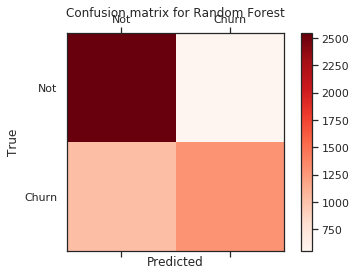

Logistic Regression
Accuracy is: 0.648
precision is: 0.614
recall is: 0.472


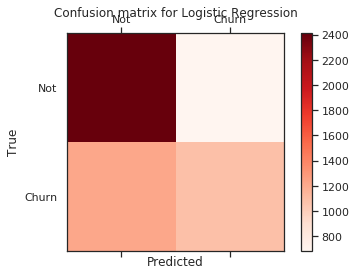

In [39]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

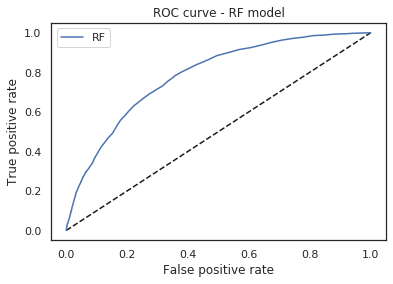

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [42]:
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

0.7815492765253592

#### Part 3.4.1: ROC of LR Model

In [0]:
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

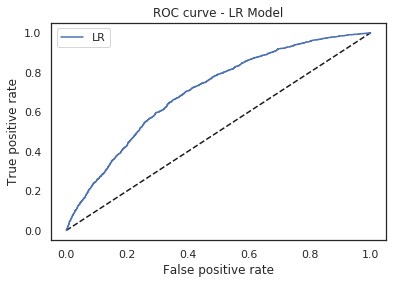

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [45]:
metrics.auc(fpr_lr,tpr_lr)

0.7024242445480955

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

In [46]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      dataset.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
purchases_partners: -0.7522
purchases: -0.3457
deposits: 0.2236
reward_rate: -0.1786
age: -0.1708
web_user: 0.1489
rejected_loan: 0.1107
registered_phones: 0.1085
received_loan: 0.0957
cancelled_loan: 0.0779
cc_taken: 0.0698
payment_type_Weekly: 0.0635
android_user: -0.0587
left_for_two_month_plus: 0.0553
left_for_one_month: 0.0507
withdrawal: 0.0486
payment_type_Bi-Weekly: -0.0458
cc_recommended: 0.0429
housing_R: 0.0401
housing_O: -0.0382
waiting_4_loan: -0.0296
zodiac_sign_Pisces: 0.0291
cc_application_begin: 0.0272
payment_type_Semi-Monthly: -0.0248
zodiac_sign_Aquarius: -0.0215
app_downloaded: 0.0197
is_referred: 0.0197
zodiac_sign_Cancer: 0.0193
zodiac_sign_Capricorn: 0.0192
payment_type_Monthly: -0.0178
cc_disliked: -0.0175
app_web_user: -0.0157
zodiac_sign_Aries: 0.0144
zodiac_sign_Gemini: -0.0138
zodiac_sign_Libra: -0.0122
zodiac_sign_Taurus: -0.0109
cc_liked: -0.0081
zodiac_sign_Virgo: 0.0072
zodiac_sign_Scorpio: -0.006
zodiac_sign_Sagitt

In [47]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      dataset.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L2) Coefficients
purchases_partners: -0.753
purchases: -0.4402
deposits: 0.3175
reward_rate: -0.1796
web_user: 0.1769
age: -0.1711
rejected_loan: 0.111
registered_phones: 0.1085
received_loan: 0.0959
cancelled_loan: 0.0781
cc_taken: 0.0699
payment_type_Weekly: 0.0632
android_user: -0.0589
left_for_two_month_plus: 0.0555
left_for_one_month: 0.0509
withdrawal: 0.0489
payment_type_Bi-Weekly: -0.0464
app_web_user: -0.0444
cc_recommended: 0.0442
housing_R: 0.0403
housing_O: -0.0383
app_downloaded: 0.0313
waiting_4_loan: -0.0298
zodiac_sign_Pisces: 0.0293
cc_application_begin: 0.0273
payment_type_Semi-Monthly: -0.0252
zodiac_sign_Aquarius: -0.0217
is_referred: 0.0198
zodiac_sign_Cancer: 0.0195
zodiac_sign_Capricorn: 0.0193
payment_type_Monthly: -0.0182
cc_disliked: -0.0178
zodiac_sign_Aries: 0.0145
zodiac_sign_Gemini: -0.014
zodiac_sign_Libra: -0.0124
zodiac_sign_Taurus: -0.0111
cc_liked: -0.0084
zodiac_sign_Virgo: 0.0073
zodiac_sign_Scorpio: -0.0062
zodiac_sign_Sagittar

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [48]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), dataset.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
purchases_partners: 0.1541
age: 0.1286
reward_rate: 0.1281
cc_recommended: 0.1253
cc_application_begin: 0.0661
deposits: 0.0248
purchases: 0.0242
android_user: 0.0218
registered_phones: 0.0198
payment_type_Bi-Weekly: 0.0186
housing_R: 0.018
left_for_two_month_plus: 0.0169
is_referred: 0.0169
payment_type_Weekly: 0.0125
zodiac_sign_Gemini: 0.0121
zodiac_sign_Cancer: 0.0121
zodiac_sign_Leo: 0.012
withdrawal: 0.012
zodiac_sign_Virgo: 0.0118
zodiac_sign_Pisces: 0.0118
zodiac_sign_Taurus: 0.0116
zodiac_sign_Scorpio: 0.011
payment_type_Semi-Monthly: 0.011
zodiac_sign_Sagittarius: 0.0109
zodiac_sign_Aquarius: 0.0108
zodiac_sign_Aries: 0.0106
zodiac_sign_Libra: 0.0101
payment_type_Monthly: 0.01
app_web_user: 0.01
web_user: 0.0096
housing_O: 0.0088
cc_taken: 0.0075
zodiac_sign_Capricorn: 0.0061
received_loan: 0.0055
cancelled_loan: 0.0044
left_for_one_month: 0.0038
cc_disliked: 0.0036
app_downloaded: 0.0025
rejected_loan: 0.0023
cc_liked: 0.001

In [0]:
## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
# Model to Test
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X.columns[rfe.support_]

[ True  True  True  True  True  True False False False False  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True False False False  True False False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  5 17 15 11  1  1  1  1  1  1  1  1  1  1  1  1  6  2
  1  4 13 12  1 14  9  8  7 20 19 16  3 21 22 18 10]


Int64Index([0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            24, 28],
           dtype='int64')